In [1]:
import os
import sys
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


current_dir = os.getcwd()  # Current directory
pyfcs_dir = os.path.abspath(os.path.join(current_dir, '..', '..'))

# Add the PyFCS path to sys.path
sys.path.append(pyfcs_dir)

## Analisis de No aciertos

In [2]:
# Load the Excel file
file_path = "confidence_comparative.xlsx"

# Read all sheets
xls = pd.ExcelFile(file_path)

# Store results
results_zero = []

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Filter only the Score (1-5) columns
    score_columns = ["Upper Score (1-5)", "Central Score (1-5)", "Lower Score (1-5)"]
    score_columns = [col for col in score_columns if col in df.columns]  # Ensure they exist in the sheet
    
    count_upper = df["Upper Score (1-5)"].eq("0").sum() if "Upper Score (1-5)" in df.columns else 0
    count_central = df["Central Score (1-5)"].eq("0").sum() if "Central Score (1-5)" in df.columns else 0
    count_lower = df["Lower Score (1-5)"].eq("0").sum() if "Lower Score (1-5)" in df.columns else 0
    total = count_upper + count_central + count_lower
    
    print(f"{sheet_name}")
    print(f"   Upper: {count_upper}  |  Central: {count_central}  |  Lower: {count_lower},     |     Total: {total}\n")
    print(f"   ")
    
    results_zero.append([sheet_name, count_upper, count_central, count_lower, total])

MariaTejada
   Upper: 2  |  Central: 0  |  Lower: 4,     |     Total: 6

   
Razvan
   Upper: 3  |  Central: 0  |  Lower: 2,     |     Total: 5

   
Oscar
   Upper: 4  |  Central: 1  |  Lower: 4,     |     Total: 9

   
Antonio
   Upper: 3  |  Central: 4  |  Lower: 6,     |     Total: 13

   
Inma
   Upper: 6  |  Central: 3  |  Lower: 4,     |     Total: 13

   
Javi
   Upper: 5  |  Central: 2  |  Lower: 6,     |     Total: 13

   
Cris_L
   Upper: 6  |  Central: 7  |  Lower: 9,     |     Total: 22

   
Carmen
   Upper: 6  |  Central: 8  |  Lower: 7,     |     Total: 21

   
Virginia
   Upper: 7  |  Central: 7  |  Lower: 9,     |     Total: 23

   
Esther
   Upper: 5  |  Central: 1  |  Lower: 5,     |     Total: 11

   
Cris_Be
   Upper: 3  |  Central: 3  |  Lower: 6,     |     Total: 12

   
Cris_V
   Upper: 3  |  Central: 0  |  Lower: 7,     |     Total: 10

   
Marta
   Upper: 7  |  Central: 7  |  Lower: 9,     |     Total: 23

   
Eva
   Upper: 7  |  Central: 3  |  Lower: 10,     |

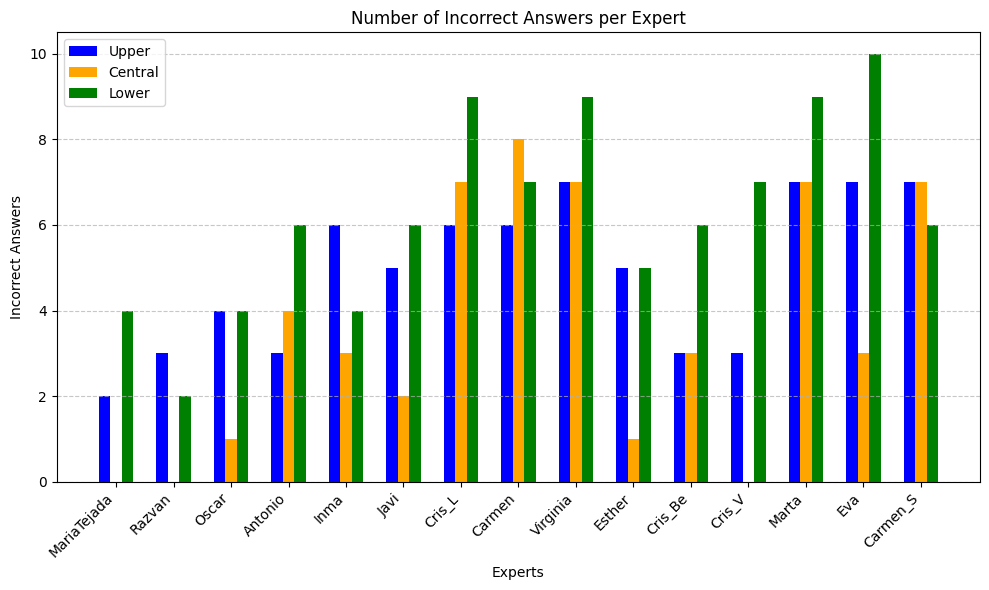

In [3]:
# Convert results to DataFrame
df_results = pd.DataFrame(results_zero, columns=["Sheet", "Upper", "Central", "Lower", "Total"])

# Plot histogram
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(df_results["Sheet"]))

plt.bar(x - bar_width, df_results["Upper"], width=bar_width, label="Upper", color="blue")
plt.bar(x, df_results["Central"], width=bar_width, label="Central", color="orange")
plt.bar(x + bar_width, df_results["Lower"], width=bar_width, label="Lower", color="green")

# Labels and title
plt.xlabel("Experts")
plt.ylabel("Incorrect Answers")
plt.title("Number of Incorrect Answers per Expert")
plt.xticks(ticks=x, labels=df_results["Sheet"], rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

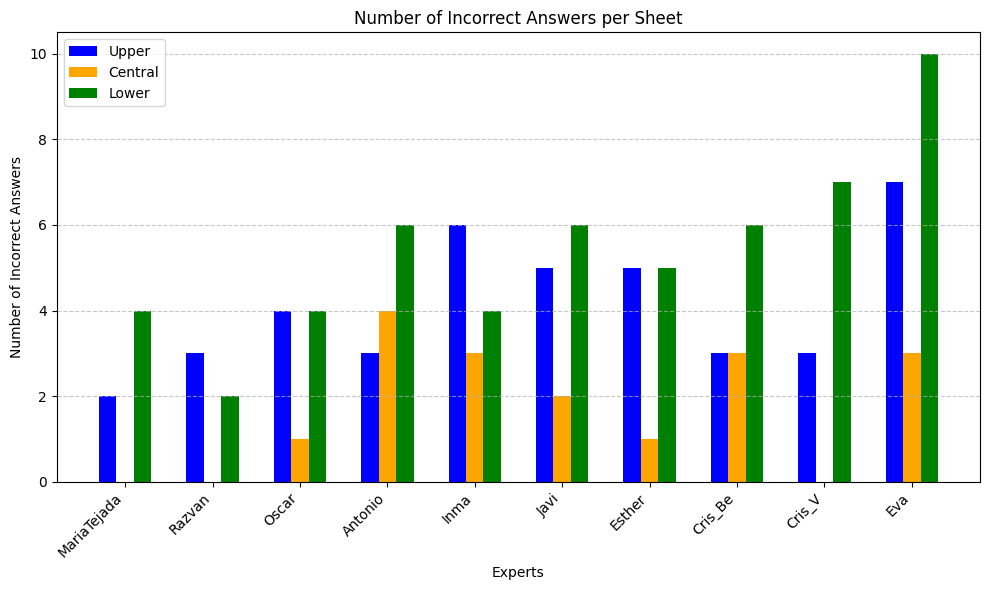

In [4]:
# Convert results to DataFrame
df_results = pd.DataFrame(results_zero, columns=["Sheet", "Upper", "Central", "Lower", "Total"])

# 🔹 FILTER: Remove rows where "Central" is greater than 5
df_results_filter = df_results[df_results["Central"] <= 5]

# Plot histogram
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(df_results_filter["Sheet"]))

plt.bar(x - bar_width, df_results_filter["Upper"], width=bar_width, label="Upper", color="blue")
plt.bar(x, df_results_filter["Central"], width=bar_width, label="Central", color="orange")
plt.bar(x + bar_width, df_results_filter["Lower"], width=bar_width, label="Lower", color="green")

# Labels and title
plt.xlabel("Experts")
plt.ylabel("Number of Incorrect Answers")
plt.title("Number of Incorrect Answers per Sheet")
plt.xticks(ticks=x, labels=df_results_filter["Sheet"], rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Analisis aciertos

In [5]:
# Load the Excel file
file_path = "confidence_comparative.xlsx"

# Read all sheets
xls = pd.ExcelFile(file_path)

# Store results
results_all = []

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Filter only the Score (1-5) columns
    score_columns = ["Upper Score (1-5)", "Central Score (1-5)", "Lower Score (1-5)"]
    score_columns = [col for col in score_columns if col in df.columns]  # Ensure they exist in the sheet
    
    count_upper = df["Upper Score (1-5)"].ne("0").sum() if "Upper Score (1-5)" in df.columns else 0
    count_central = df["Central Score (1-5)"].ne("0").sum() if "Central Score (1-5)" in df.columns else 0
    count_lower = df["Lower Score (1-5)"].ne("0").sum() if "Lower Score (1-5)" in df.columns else 0
    total = count_upper + count_central + count_lower
    
    # print(f"{sheet_name}")
    # print(f"   Upper: {count_upper}  |  Central: {count_central}  |  Lower: {count_lower},     |     Total: {total}\n")
    # print(f"   ")
    
    results_all.append([sheet_name, count_upper, count_central, count_lower, total])

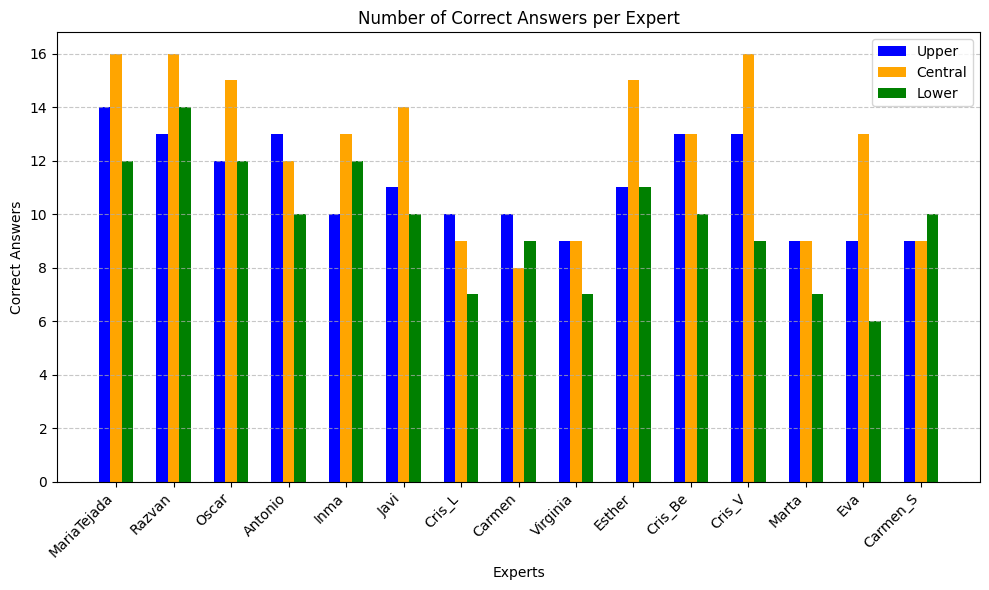

In [6]:
# Convert results to DataFrame
df_results = pd.DataFrame(results_all, columns=["Sheet", "Upper", "Central", "Lower", "Total"])

# Plot histogram
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(df_results["Sheet"]))

plt.bar(x - bar_width, df_results["Upper"], width=bar_width, label="Upper", color="blue")
plt.bar(x, df_results["Central"], width=bar_width, label="Central", color="orange")
plt.bar(x + bar_width, df_results["Lower"], width=bar_width, label="Lower", color="green")

# Labels and title
plt.xlabel("Experts")
plt.ylabel("Correct Answers")
plt.title("Number of Correct Answers per Expert")
plt.xticks(ticks=x, labels=df_results["Sheet"], rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

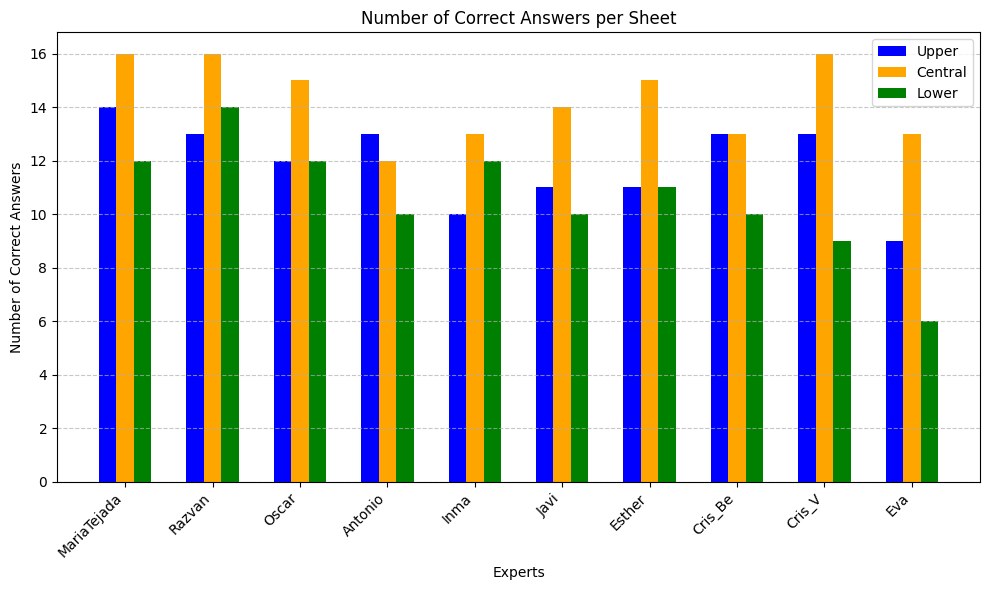

In [7]:
# Convert results to DataFrame
df_results = pd.DataFrame(results_all, columns=["Sheet", "Upper", "Central", "Lower", "Total"])

# 🔹 FILTER: Remove rows where "Central" is greater than 10
df_results = df_results[df_results["Central"] > 10]

# Plot histogram
plt.figure(figsize=(10, 6))
bar_width = 0.2
x = np.arange(len(df_results["Sheet"]))

plt.bar(x - bar_width, df_results["Upper"], width=bar_width, label="Upper", color="blue")
plt.bar(x, df_results["Central"], width=bar_width, label="Central", color="orange")
plt.bar(x + bar_width, df_results["Lower"], width=bar_width, label="Lower", color="green")

# Labels and title
plt.xlabel("Experts")
plt.ylabel("Number of Correct Answers")
plt.title("Number of Correct Answers per Sheet")
plt.xticks(ticks=x, labels=df_results["Sheet"], rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

## Resultados Elevados

In [8]:
# Load the Excel file
file_path = "confidence_comparative.xlsx"

# Read all sheets
xls = pd.ExcelFile(file_path)

# Store results
results_high = []

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Filter only the Score (1-5) columns
    score_columns = ["Upper Score (1-5)", "Central Score (1-5)", "Lower Score (1-5)"]
    score_columns = [col for col in score_columns if col in df.columns]  # Ensure they exist in the sheet
    
    # Count the correct answers in each column (values 3, 4, or 5 in the column)
    # count_upper = df["Upper Score (1-5)"].apply(lambda x: any(score in str(x) for score in ["|3", "|4", "|5"])).sum() if "Upper Score (1-5)" in df.columns else 0
    # count_central = df["Central Score (1-5)"].apply(lambda x: any(score in str(x) for score in ["|3", "|4", "|5"])).sum() if "Central Score (1-5)" in df.columns else 0
    # count_lower = df["Lower Score (1-5)"].apply(lambda x: any(score in str(x) for score in ["|3", "|4", "|5"])).sum() if "Lower Score (1-5)" in df.columns else 0

    count_upper = df["Upper Score (1-5)"].apply(lambda x: any(score in str(x) for score in ["|4", "|5"])).sum() if "Upper Score (1-5)" in df.columns else 0
    count_central = df["Central Score (1-5)"].apply(lambda x: any(score in str(x) for score in ["|4", "|5"])).sum() if "Central Score (1-5)" in df.columns else 0
    count_lower = df["Lower Score (1-5)"].apply(lambda x: any(score in str(x) for score in ["|4", "|5"])).sum() if "Lower Score (1-5)" in df.columns else 0
    
    # Calculate the total correct answers
    total = count_upper + count_central + count_lower
    
    # print(f"{sheet_name}")
    # print(f"   Upper: {count_upper}  |  Central: {count_central}  |  Lower: {count_lower},     |     Total: {total}\n")
    # print(f"   ")
    
    results_high.append([sheet_name, count_upper, count_central, count_lower, total])


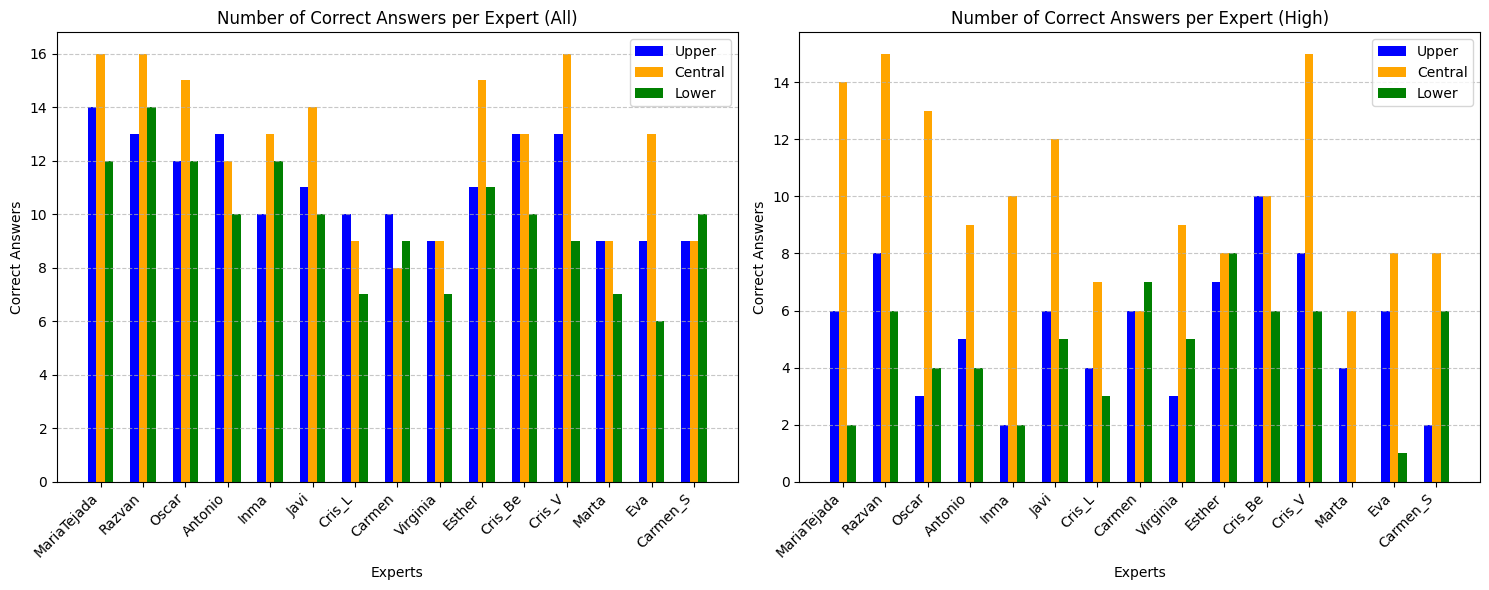

In [9]:
# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot (for 'results_all')
df_results_all = pd.DataFrame(results_all, columns=["Sheet", "Upper", "Central", "Lower", "Total"])
bar_width = 0.2
x_all = np.arange(len(df_results_all["Sheet"]))

axes[0].bar(x_all - bar_width, df_results_all["Upper"], width=bar_width, label="Upper", color="blue")
axes[0].bar(x_all, df_results_all["Central"], width=bar_width, label="Central", color="orange")
axes[0].bar(x_all + bar_width, df_results_all["Lower"], width=bar_width, label="Lower", color="green")

axes[0].set_xlabel("Experts")
axes[0].set_ylabel("Correct Answers")
axes[0].set_title("Number of Correct Answers per Expert (All)")
axes[0].set_xticks(x_all)
axes[0].set_xticklabels(df_results_all["Sheet"], rotation=45, ha="right")
axes[0].legend()
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Second plot (for 'results_high')
df_results_high = pd.DataFrame(results_high, columns=["Sheet", "Upper", "Central", "Lower", "Total"])
x_high = np.arange(len(df_results_high["Sheet"]))

axes[1].bar(x_high - bar_width, df_results_high["Upper"], width=bar_width, label="Upper", color="blue")
axes[1].bar(x_high, df_results_high["Central"], width=bar_width, label="Central", color="orange")
axes[1].bar(x_high + bar_width, df_results_high["Lower"], width=bar_width, label="Lower", color="green")

axes[1].set_xlabel("Experts")
axes[1].set_ylabel("Correct Answers")
axes[1].set_title("Number of Correct Answers per Expert (High)")
axes[1].set_xticks(x_high)
axes[1].set_xticklabels(df_results_high["Sheet"], rotation=45, ha="right")
axes[1].legend()
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout so labels don't overlap
plt.tight_layout()

# Show the plots
plt.show()

### Diente que más confunde

In [10]:
# Store results
error_counts = {}

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Filter only the Score (1-5) columns
    score_columns = ["Upper Score (1-5)", "Central Score (1-5)", "Lower Score (1-5)"]
    score_columns = [col for col in score_columns if col in df.columns]  # Ensure they exist in the sheet
    
    # Count the errors (0s) for each diente (Tooth) across all score columns
    for score_col in score_columns:
        # Get rows where the score is 0
        error_rows = df[df[score_col] == "0"]
        
        # Count errors per Tooth
        for tooth in error_rows["Tooth"]:
            if tooth not in error_counts:
                error_counts[tooth] = 0
            error_counts[tooth] += 1

# Get the top 5 teeth with the most errors
top_10_teeth = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the results
print("Top dientes con más errores:")
for tooth, count in top_10_teeth:
    print(f"Diente: {tooth}, Errores: {count}")

Top dientes con más errores:
Diente: A2, Errores: 25
Diente: A3, Errores: 24
Diente: A3_5, Errores: 23
Diente: B3, Errores: 22
Diente: B2, Errores: 21
Diente: D4, Errores: 20
Diente: B4, Errores: 16
Diente: C3, Errores: 14
Diente: A1, Errores: 12
Diente: C1, Errores: 10


In [11]:
# Store results
error_counts = {}

for sheet_name in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    # Focus only on the "Central Score (1-5)" column
    if "Central Score (1-5)" in df.columns:
        # Get rows where the "Central Score (1-5)" is 0
        error_rows = df[df["Central Score (1-5)"] == "0"]
        
        # Count errors per Tooth
        for tooth in error_rows["Tooth"]:
            if tooth not in error_counts:
                error_counts[tooth] = 0
            error_counts[tooth] += 1

# Get the top 5 teeth with the most errors in the Central Score (1-5)
top_5_teeth = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)[:]

# Print the results
print("Top dientes con más errores en Central (sin contar los que tienen más de 5 errores):")
for tooth, count in top_5_teeth:
    print(f"Diente: {tooth}, Errores: {count}")

Top dientes con más errores en Central (sin contar los que tienen más de 5 errores):
Diente: D4, Errores: 9
Diente: A3, Errores: 6
Diente: B2, Errores: 6
Diente: B4, Errores: 5
Diente: A1, Errores: 4
Diente: A4, Errores: 4
Diente: B3, Errores: 4
Diente: A2, Errores: 3
Diente: C4, Errores: 2
Diente: C2, Errores: 2
Diente: C3, Errores: 2
Diente: A3_5, Errores: 2
Diente: C1, Errores: 2
Diente: D2, Errores: 1
Diente: D3, Errores: 1


### Sin outlier

In [12]:
error_counts = {}
for sheet_name in xls.sheet_names:
    if sheet_name not in df_results_filter["Sheet"].tolist():
        continue  
    
    df = pd.read_excel(xls, sheet_name=sheet_name)
    
    score_columns = ["Upper Score (1-5)", "Central Score (1-5)", "Lower Score (1-5)"]
    score_columns = [col for col in score_columns if col in df.columns]  
    
    for score_col in score_columns:
        error_rows = df[df[score_col] == "0"]
        
        for tooth in error_rows["Tooth"]:
            error_counts[tooth] = error_counts.get(tooth, 0) + 1

top_10_teeth = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top dientes con más errores:")
for tooth, count in top_10_teeth:
    print(f"Diente: {tooth}, Errores: {count}")


Top dientes con más errores:
Diente: A2, Errores: 16
Diente: D4, Errores: 12
Diente: A3_5, Errores: 11
Diente: B3, Errores: 11
Diente: A3, Errores: 10
Diente: B2, Errores: 9
Diente: A1, Errores: 6
Diente: B4, Errores: 6
Diente: C3, Errores: 6
Diente: D3, Errores: 5


In [13]:
error_counts = {}
for sheet_name in xls.sheet_names:
    if sheet_name not in df_results_filter["Sheet"].tolist():
        continue  
    
    df = pd.read_excel(xls, sheet_name=sheet_name)
    if "Central Score (1-5)" in df.columns:
        error_rows = df[df["Central Score (1-5)"] == "0"]
        
        for tooth in error_rows["Tooth"]:
            if tooth not in error_counts:
                error_counts[tooth] = 0
            error_counts[tooth] += 1

top_5_teeth = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)[:]

print("Top dientes con más errores en Central (sin contar los que tienen más de 5 errores):")
for tooth, count in top_5_teeth:
    print(f"Diente: {tooth}, Errores: {count}")

Top dientes con más errores en Central (sin contar los que tienen más de 5 errores):
Diente: D4, Errores: 5
Diente: B2, Errores: 2
Diente: B4, Errores: 2
Diente: B3, Errores: 2
Diente: A1, Errores: 1
Diente: A2, Errores: 1
Diente: A4, Errores: 1
Diente: C4, Errores: 1
Diente: A3, Errores: 1
Diente: C1, Errores: 1
